# Missing residues

We check the number and position of missing residues in kinase structures (fetched from KLIFS).

In [1]:
from opencadd.databases.klifs import setup_remote

In [2]:
klifs_session = setup_remote()

In [3]:
structures = klifs_session.structures.all_structures()
print(structures.shape)
print(structures[structures["species.klifs"] == "Human"].shape)

(12572, 46)
(11896, 46)


## Number of missing residues per structure

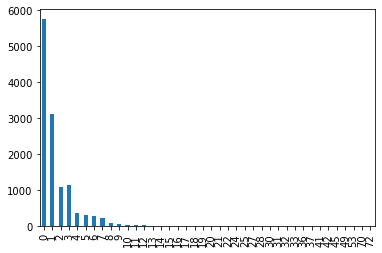

In [4]:
structure_pockets = structures["structure.pocket"]
structure_pockets.str.count("_").value_counts().sort_index().plot(kind="bar");

## Number of missing residues per structure filtered by KLIFS quality score

In [5]:
structures_filtered = structures[structures["structure.qualityscore"] >= 6]
print(structures_filtered.shape)
print(structures_filtered[structures_filtered["species.klifs"] == "Human"].shape)

(11973, 46)
(11325, 46)


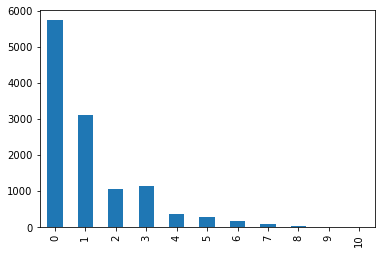

In [6]:
structure_pockets = structures_filtered["structure.pocket"]
structure_pockets.str.count("_").value_counts().sort_index().plot(kind="bar");

## Number of missing residues per structure and position

In [7]:
def missing_residue_positions(pocket_sequence):
    try:
        return pocket_sequence.index("_")
    except ValueError:
        return None

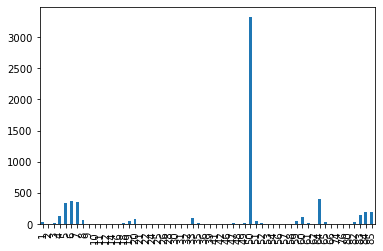

In [8]:
missing_residues_per_position = (
    structure_pockets.apply(missing_residue_positions).dropna().value_counts().sort_index()
)
missing_residues_per_position.index = [int(i) + 1 for i in missing_residues_per_position.index]
missing_residues_per_position.plot(kind="bar");